# 3. Modelos de regresiones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv("df_final.csv")

In [3]:
datos

,id_anony,Cod.Car.Sec,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
0,es_2677,CGF-PLS13,2,1,0,5.0,3.0,5.0,3.0,5.0,4.000000,4.166667
1,es_2728,CGF-PLS13,5,1,2,3.0,1.5,1.5,2.0,2.0,5.000000,2.312500
2,es_3008,CGF-PLS13,2,1,0,2.0,3.0,4.0,4.0,5.0,4.000000,3.666667
3,es_3110,CGF-PLS13,2,1,0,4.0,4.0,5.0,5.0,5.0,5.000000,4.666667
4,es_1810,CIV-PLS13,2,1,0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
684,es_3391,MEC-PLS13,2,1,0,2.0,1.5,2.0,1.5,2.0,3.000000,2.000000
685,es_3422,MEC-PLS13,2,1,0,5.0,4.0,5.0,3.0,5.0,1.333333,3.888889
686,es_3489,MEC-PLS13,2,1,0,5.0,4.0,5.0,3.0,5.0,2.000000,4.000000
687,es_3816,MEC-PLS13,2,1,0,4.0,5.0,5.0,5.0,5.0,5.000000,4.833333


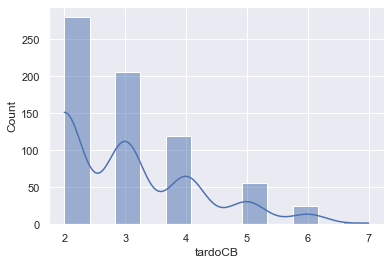

In [4]:
sns.set(style="darkgrid")
sns.histplot(data=datos, x="tardoCB",kde=True)
plt.show()

In [5]:
print(datos['tardoCB'].value_counts())

2    280
3    206
4    119
5     56
6     25
7      3
Name: tardoCB, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [7]:
dummy_df = pd.get_dummies(datos['Cod.Car.Sec'],drop_first=True)

In [8]:
dummy_df

,CIV-PLS13,ECA-PLS13,ELE-PLS13,IND-PLS13,MCT-PLS13,MEC-PLS13
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
684,0,0,0,0,0,1
685,0,0,0,0,0,1
686,0,0,0,0,0,1
687,0,0,0,0,0,1


In [9]:
datos = pd.concat([datos, dummy_df], axis=1)

In [10]:
datos

,id_anony,Cod.Car.Sec,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S,CIV-PLS13,ECA-PLS13,ELE-PLS13,IND-PLS13,MCT-PLS13,MEC-PLS13
0,es_2677,CGF-PLS13,2,1,0,5.0,3.0,5.0,3.0,5.0,4.000000,4.166667,0,0,0,0,0,0
1,es_2728,CGF-PLS13,5,1,2,3.0,1.5,1.5,2.0,2.0,5.000000,2.312500,0,0,0,0,0,0
2,es_3008,CGF-PLS13,2,1,0,2.0,3.0,4.0,4.0,5.0,4.000000,3.666667,0,0,0,0,0,0
3,es_3110,CGF-PLS13,2,1,0,4.0,4.0,5.0,5.0,5.0,5.000000,4.666667,0,0,0,0,0,0
4,es_1810,CIV-PLS13,2,1,0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,es_3391,MEC-PLS13,2,1,0,2.0,1.5,2.0,1.5,2.0,3.000000,2.000000,0,0,0,0,0,1
685,es_3422,MEC-PLS13,2,1,0,5.0,4.0,5.0,3.0,5.0,1.333333,3.888889,0,0,0,0,0,1
686,es_3489,MEC-PLS13,2,1,0,5.0,4.0,5.0,3.0,5.0,2.000000,4.000000,0,0,0,0,0,1
687,es_3816,MEC-PLS13,2,1,0,4.0,5.0,5.0,5.0,5.0,5.000000,4.833333,0,0,0,0,0,1


In [11]:
target = 'tardoCB'
X = datos.drop(columns=[target,'Cod.Car.Sec','PasoCB','id_anony'])
y = pd.DataFrame(datos[target].values.astype(np.int64), columns=[target])
X.shape, y.shape

((689, 14), (689, 1))

In [12]:
X[target] = pd.Series(y[target])
train, test = train_test_split(X, stratify=X[target], test_size=0.2, random_state=365)

In [13]:
# modelo 1: Regresion lineal

In [14]:
variables = ['recursadas_s1','prom_al1','prom_c1','prom_dt','prom_f1','prom_ga','prom_gd','prom_1er_S',
             'CIV-PLS13 ','ECA-PLS13 ','ELE-PLS13 ','IND-PLS13 ','MCT-PLS13 ','MEC-PLS13 ']
lr = LinearRegression()
lr.fit(train[variables], train[target])
lr_predictions = lr.predict(test[variables])

In [15]:
lr_predictions = [round(val, 0) for val in lr_predictions]

In [16]:
test.loc[:, ('lr-predicted')] = lr_predictions
test

C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S,CIV-PLS13,ECA-PLS13,ELE-PLS13,IND-PLS13,MCT-PLS13,MEC-PLS13,tardoCB,lr-predicted
220,0,5.0,2.0,4.0,2.0,5.0,3.0,3.500000,1,0,0,0,0,0,3,3.0
347,0,5.0,2.5,5.0,5.0,1.5,5.0,4.000000,0,1,0,0,0,0,2,2.0
482,0,5.0,2.0,5.0,1.5,5.0,4.0,3.750000,0,0,1,0,0,0,2,3.0
613,0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,0,0,0,0,1,0,2,2.0
539,0,5.0,5.0,4.0,5.0,5.0,5.0,4.833333,0,0,0,1,0,0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,5.0,5.0,4.0,3.0,5.0,5.0,4.500000,1,0,0,0,0,0,4,2.0
172,0,4.0,5.0,4.0,4.0,3.0,5.0,4.166667,1,0,0,0,0,0,3,3.0
203,1,5.0,4.0,2.0,2.0,2.0,5.0,3.333333,1,0,0,0,0,0,5,4.0
294,0,3.0,5.0,3.0,5.0,3.0,4.0,3.833333,1,0,0,0,0,0,3,3.0


In [17]:
print(classification_report(test[target], lr_predictions, digits=4))

              precision    recall  f1-score   support

         1.0     0.0000    0.0000    0.0000         0
         2.0     0.8056    0.5179    0.6304        56
         3.0     0.4559    0.7561    0.5688        41
         4.0     0.4074    0.4583    0.4314        24
         5.0     0.6000    0.2727    0.3750        11
         6.0     0.0000    0.0000    0.0000         5
         7.0     0.0000    0.0000    0.0000         1

    accuracy                         0.5362       138
   macro avg     0.3241    0.2864    0.2865       138
weighted avg     0.5810    0.5362    0.5297       138



C:\Users\gonza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# modelo 2: Regresion logistica

In [19]:
datos

,id_anony,Cod.Car.Sec,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S,CIV-PLS13,ECA-PLS13,ELE-PLS13,IND-PLS13,MCT-PLS13,MEC-PLS13
0,es_2677,CGF-PLS13,2,1,0,5.0,3.0,5.0,3.0,5.0,4.000000,4.166667,0,0,0,0,0,0
1,es_2728,CGF-PLS13,5,1,2,3.0,1.5,1.5,2.0,2.0,5.000000,2.312500,0,0,0,0,0,0
2,es_3008,CGF-PLS13,2,1,0,2.0,3.0,4.0,4.0,5.0,4.000000,3.666667,0,0,0,0,0,0
3,es_3110,CGF-PLS13,2,1,0,4.0,4.0,5.0,5.0,5.0,5.000000,4.666667,0,0,0,0,0,0
4,es_1810,CIV-PLS13,2,1,0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,es_3391,MEC-PLS13,2,1,0,2.0,1.5,2.0,1.5,2.0,3.000000,2.000000,0,0,0,0,0,1
685,es_3422,MEC-PLS13,2,1,0,5.0,4.0,5.0,3.0,5.0,1.333333,3.888889,0,0,0,0,0,1
686,es_3489,MEC-PLS13,2,1,0,5.0,4.0,5.0,3.0,5.0,2.000000,4.000000,0,0,0,0,0,1
687,es_3816,MEC-PLS13,2,1,0,4.0,5.0,5.0,5.0,5.0,5.000000,4.833333,0,0,0,0,0,1


In [20]:
variables = ['recursadas_s1','prom_al1','prom_c1','prom_dt','prom_f1','prom_ga','prom_gd','prom_1er_S',
             'CIV-PLS13 ','ECA-PLS13 ','ELE-PLS13 ','IND-PLS13 ','MCT-PLS13 ','MEC-PLS13 ']
reg = LogisticRegression(multi_class='multinomial',solver='saga')
reg.fit(train[variables], train[target])
reg_predictions = reg.predict(test[variables])

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [21]:
test.copy()
test.loc[:, ('reg-predicted')] = reg_predictions
test

C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S,CIV-PLS13,ECA-PLS13,ELE-PLS13,IND-PLS13,MCT-PLS13,MEC-PLS13,tardoCB,lr-predicted,reg-predicted
220,0,5.0,2.0,4.0,2.0,5.0,3.0,3.500000,1,0,0,0,0,0,3,3.0,4
347,0,5.0,2.5,5.0,5.0,1.5,5.0,4.000000,0,1,0,0,0,0,2,2.0,3
482,0,5.0,2.0,5.0,1.5,5.0,4.0,3.750000,0,0,1,0,0,0,2,3.0,4
613,0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,0,0,0,0,1,0,2,2.0,2
539,0,5.0,5.0,4.0,5.0,5.0,5.0,4.833333,0,0,0,1,0,0,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,5.0,5.0,4.0,3.0,5.0,5.0,4.500000,1,0,0,0,0,0,4,2.0,2
172,0,4.0,5.0,4.0,4.0,3.0,5.0,4.166667,1,0,0,0,0,0,3,3.0,2
203,1,5.0,4.0,2.0,2.0,2.0,5.0,3.333333,1,0,0,0,0,0,5,4.0,3
294,0,3.0,5.0,3.0,5.0,3.0,4.0,3.833333,1,0,0,0,0,0,3,3.0,2


In [22]:
acc = metrics.accuracy_score(reg_predictions, test[target])# precision
acc

0.5

In [23]:
def create_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Pred 2', 'Pred 3', 'Pred 4', 'Pred 5', 'Pred 6', 'Pred 7']
    cm_df = cm_df.rename(index={0: 'Actual 2', 1:'Actual 3', 2:'Actual 4', 3:'Actual 5',4:'Actual 6', 5:'Actual 7'})
    return cm_df

In [24]:
create_confusion_matrix(test[target], reg_predictions)

,Pred 2,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7
Actual 2,45,9,2,0,0,0
Actual 3,18,16,6,1,0,0
Actual 4,5,13,5,0,1,0
Actual 5,0,6,2,2,1,0
Actual 6,0,2,2,0,1,0
Actual 7,0,0,0,0,1,0


In [25]:
print(classification_report(test[target], reg_predictions, digits=4))

              precision    recall  f1-score   support

           2     0.6618    0.8036    0.7258        56
           3     0.3478    0.3902    0.3678        41
           4     0.2941    0.2083    0.2439        24
           5     0.6667    0.1818    0.2857        11
           6     0.2500    0.2000    0.2222         5
           7     0.0000    0.0000    0.0000         1

    accuracy                         0.5000       138
   macro avg     0.3701    0.2973    0.3076       138
weighted avg     0.4852    0.5000    0.4771       138



C:\Users\gonza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
reg_acc = metrics.accuracy_score(reg_predictions, test[target])
lr_acc = metrics.accuracy_score(lr_predictions, test[target])
print("Precisiones:")
print('lineal: %.4f, logistica: %.4f' % (lr_acc, reg_acc))

Precisiones:
lineal: 0.5362, logistica: 0.5000


In [27]:
datos.to_csv("datos_finales_RN.csv",index=False)